In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install required libraries
!pip install ultralytics

# Check CUDA version and GPU availability
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

# Inport required libraries
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 969.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [3]:
def visualize_predictions(model, test_images_dir, num_images=5, img_size=640, conf=0.25, iou=0.45):
    """
    Visualize model predictions on random test images.
    Args:
        model: YOLO model to use for predictions
        test_images_dir: Directory containing test images
        num_images: Number of random images to visualize
        img_size: Input image size for the model
        conf: Confidence threshold
        iou: IoU threshold for NMS(Non-Maximum Suppression)
    """
    # Get list of test images
    test_images = [os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir)
                  if f.endswith(('.jpg', '.jpeg', '.png'))]

    if len(test_images) == 0:
        print("No test images found!")
        return

    # Select random images
    selected_images = random.sample(test_images, min(num_images, len(test_images)))

    print(f"Visualizing predictions on {len(selected_images)} test images...")

    # Make predictions and display results
    for i, img_path in enumerate(selected_images):
        # Perform prediction
        results = model.predict(
            source=img_path,
            imgsz=img_size,
            conf=conf,
            iou=iou
        )

        # Get the results image with bounding boxes
        res_plotted = results[0].plot()
        res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

        # Count detected LEGO pieces
        boxes = results[0].boxes
        count = len(boxes)

        # Display the prediction
        plt.figure(figsize=(10, 8))
        plt.imshow(res_plotted)
        plt.title(f"Detected {count} LEGO pieces")
        plt.axis('off')
        plt.show()

        print(f"Image {i+1}: {os.path.basename(img_path)}")
        print(f"Detected {count} LEGO pieces")
        print("-------------------")

In [6]:
# Define paths
test_images_dir = "/content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/dataset_test"
MODEL_DIR = "/content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/results/lego_detector/weights"

# List the contents of MODEL_DIR
contents = os.listdir(MODEL_DIR)

# Print the contents
print("Contents of MODEL_DIR:")
for item in contents:
    print(item)

# Verify the model file exists
model_path = os.path.join(MODEL_DIR, 'best.pt')
if os.path.exists(model_path):
    print(f"\nFile exists: {model_path}")
else:
    print(f"\nFile does not exist: {model_path}")

Contents of MODEL_DIR:
epoch0.pt
epoch5.pt
epoch10.pt
epoch15.pt
epoch20.pt
epoch25.pt
last.pt
best.pt

File exists: /content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/results/lego_detector/weights/best.pt


Model loaded successfully.

Visualizing Best Model predictions on test images:
Visualizing predictions on 5 test images...

image 1/1 /content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/dataset_test/00050130-dafd-11eb-bfed-3497f683a169.jpg: 640x640 4 legos, 450.2ms
Speed: 33.8ms preprocess, 450.2ms inference, 42.4ms postprocess per image at shape (1, 3, 640, 640)


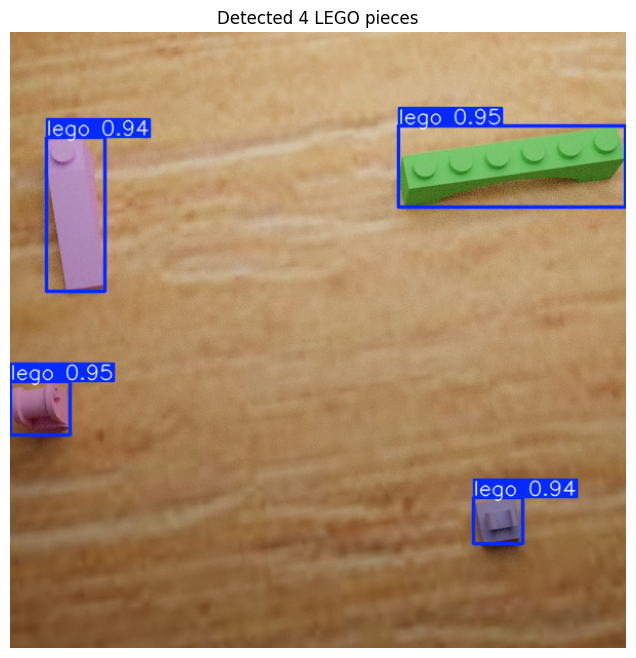

Image 1: 00050130-dafd-11eb-bfed-3497f683a169.jpg
Detected 4 LEGO pieces
-------------------

image 1/1 /content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/dataset_test/dsf.jpg: 640x640 4 legos, 253.9ms
Speed: 4.2ms preprocess, 253.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


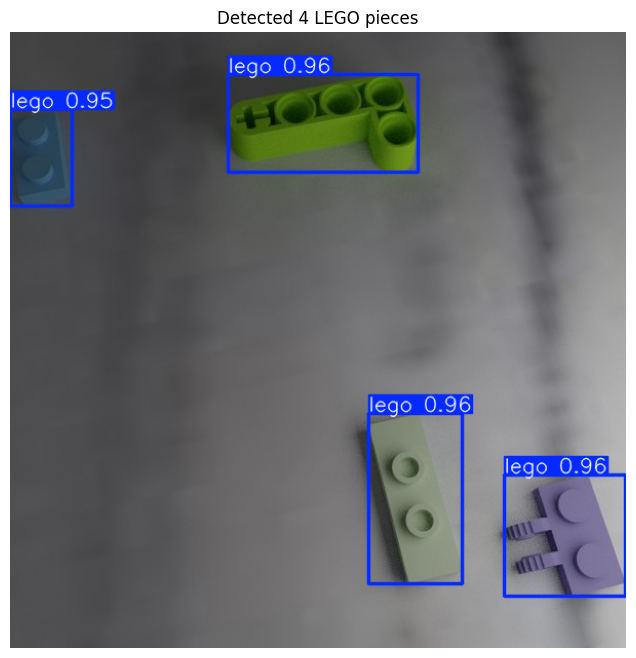

Image 2: dsf.jpg
Detected 4 LEGO pieces
-------------------

image 1/1 /content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/dataset_test/sample.jpg: 640x640 4 legos, 363.7ms
Speed: 6.2ms preprocess, 363.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


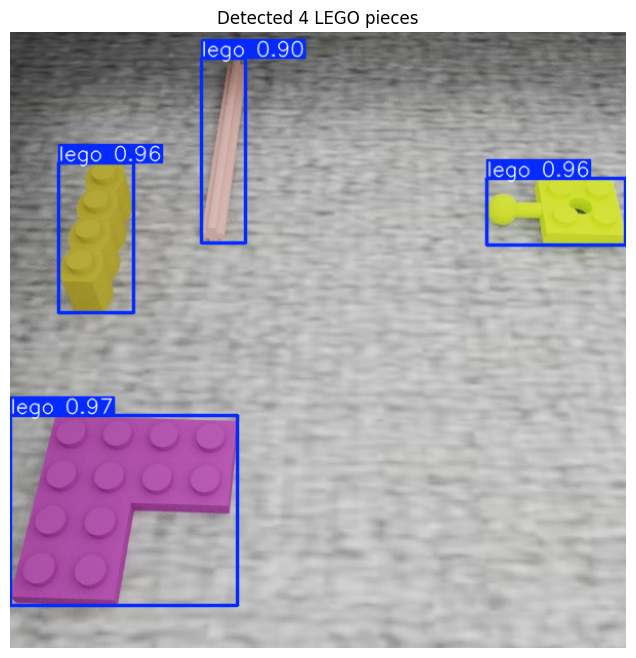

Image 3: sample.jpg
Detected 4 LEGO pieces
-------------------

image 1/1 /content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/dataset_test/dddd.jpg: 640x640 2 legos, 319.5ms
Speed: 5.5ms preprocess, 319.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


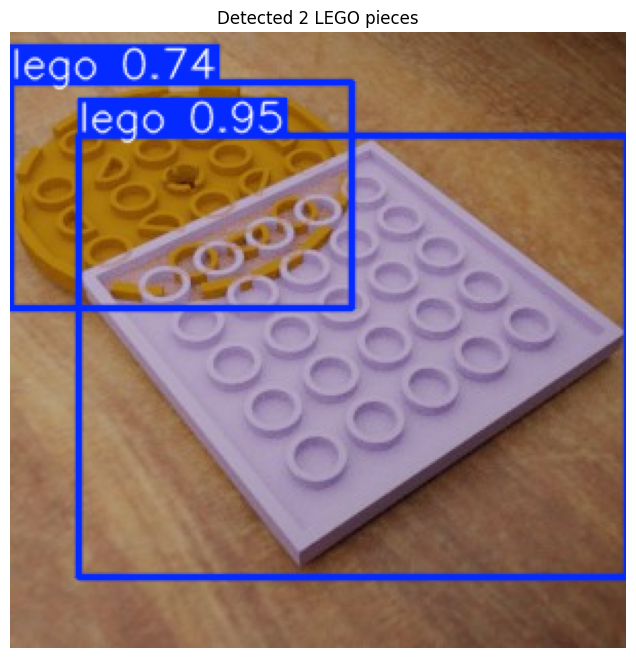

Image 4: dddd.jpg
Detected 2 LEGO pieces
-------------------

image 1/1 /content/drive/MyDrive/CS5330 - Computer Vision/Lab/Lab 3/dataset_test/00092030-e2db-11eb-bc06-b0c090bd3910.jpg: 640x640 4 legos, 216.0ms
Speed: 4.0ms preprocess, 216.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


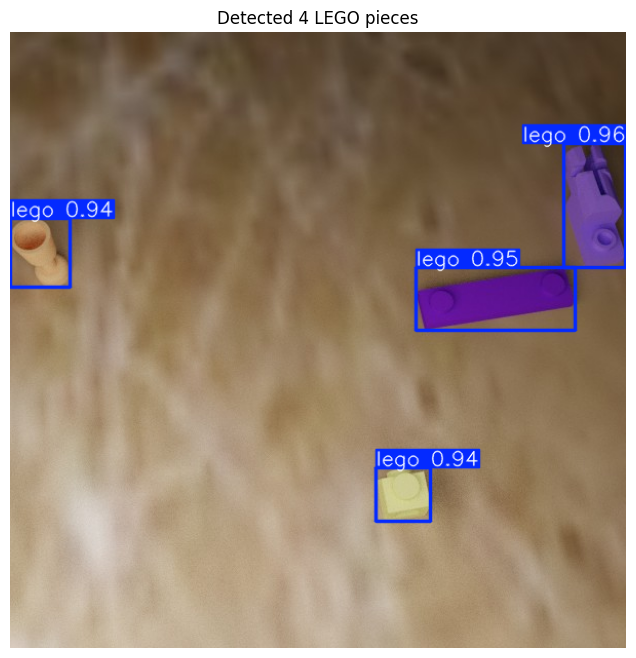

Image 5: 00092030-e2db-11eb-bc06-b0c090bd3910.jpg
Detected 4 LEGO pieces
-------------------


In [7]:
# Load the best model
try:
    best_model = YOLO(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")

# Call the visualize_predictions function
if 'best_model' in locals():
    print("\nVisualizing Best Model predictions on test images:")
    visualize_predictions(best_model, test_images_dir)